In [1]:
import easyocr
import cv2
import os
import numpy as np
from PIL import Image
import pdf2image

import torch

reader = easyocr.Reader(['en'])
poppler_path = r"D:\Release-23.08.0-0\poppler-23.08.0\Library\bin"

d:\Anaconda\envs\agent-dashboard\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.cuda.is_available()

True

In [5]:
os.getcwd()

file = os.getcwd()+"\\leases\\0247_001.pdf"

im = pdf2image.convert_from_path(file, poppler_path=poppler_path)

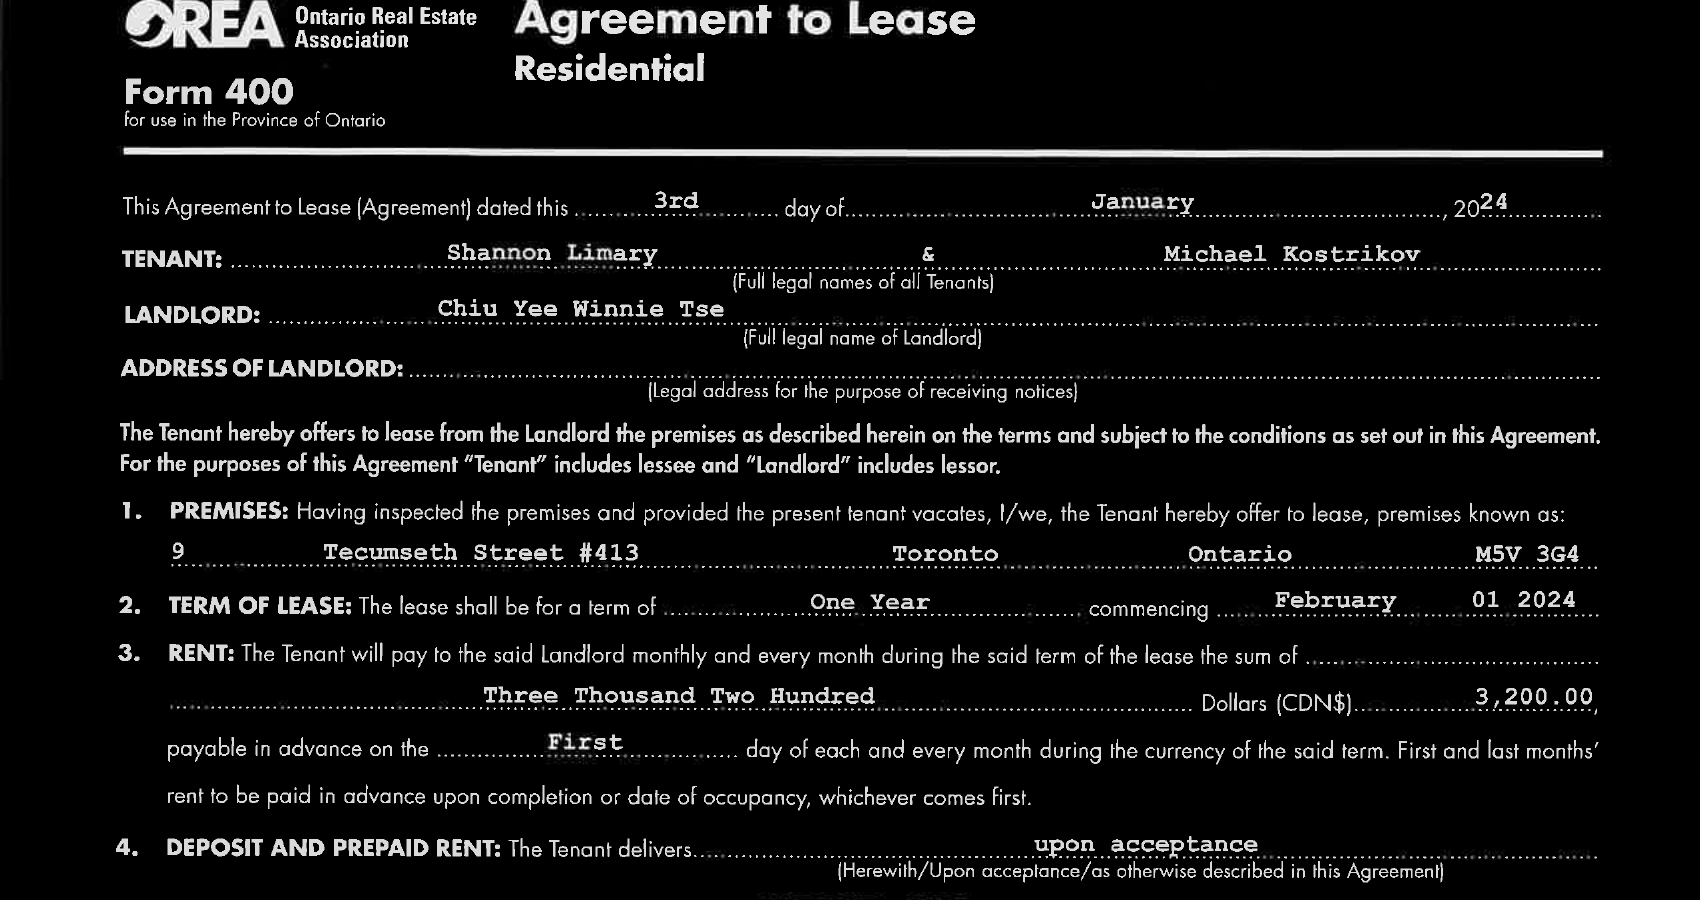

In [6]:
im[0]
pic = im[0]
a = np.array(im[15])

b = a[100:1000] #page 1, landlord
c = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
c = cv2.bitwise_not(c)

test = Image.fromarray(c)
# test

In [7]:
results = reader.readtext(c, paragraph = True, batch_size = 4, detail = 0)
full_text = ' '.join([text for (text) in results])
print(full_text)

BREA Ontario Real Estate Association Agreement to Lease Residential Form 400 for use in the Province of Ontario 3rd January This Agreement to Lease (Agreement) dated this TENANT: Shannon Limary day of. 2024 Michael Kostrikov (Full legal names of all Tenants) Chiu Yee Winnie Tse (Full legal name of Landlord) LANDLORD: ADDRESS OF LANDLORD: (Legal address for Ihe purpose of receiving notices) The Tenant hereby offers to lease from Ihe Landlord te premises as described herein on the terms and subject to the conditions 0s set out in Ihis Agreement: For the purposes of this Agreement "Tenant" includes lessee and "Landlord" includes lessor: PREMISES: Having inspected the premises and provided the present tenant vacates, V/we, the Tenant hereby offer to lease, premises known as Tecumseth Street #413 Toronto Ontario MSv 364 February 01 2024 One Year commencing 2 TERM OF LEASE: The lease shall be for & term of 3 RENT: The Tenant will pay to the said Landlord monthly and every month during the sa

In [ ]:
#files_with_400 = [] #initialize list that will get all the file names with 400 forms inside thems

In [ ]:
#main cell to count the number of 400 forms in the lease directory
z = 0
directory_path = os.getcwd()+"\\leases\\"
for file in os.listdir(directory_path):
    if file.endswith(".pdf"):
        path = directory_path+file
        im = pdf2image.convert_from_path(path, poppler_path=poppler_path)

        for i, image in enumerate(im):
            a = np.array(image)
            b = a[100:1000] #page 1, landlord
            c = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
            c = cv2.bitwise_not(c)
            results = reader.readtext(c, paragraph = True, batch_size = 4, detail = 0)
            full_text = ' '.join([text for (text) in results])
            # print(full_text)
            if "Form 400" in full_text and "Schedule A" not in full_text:
                z += 1
                print(z, f"400 in file {file} in page {i}")
                files_with_400.append(file)
                break
            else:
                print(f"no 400 in file {file} in page {i}")
                pass

In [ ]:
import pickle

with open('400_leases_list.pkl', 'wb') as f:
    pickle.dump(files_with_400, f)

# with open('400_leases_list.pkl', 'rb') as f:
#     files_with_400 = pickle.load(f)